In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def graficar_clusters(curves_data, labels, n=5):
    unique_clusters = np.unique(labels)
    
    # Crear una figura con el número de subgráficos correspondientes al número de clústeres
    fig, axes = plt.subplots(len(unique_clusters), 1, figsize=(8, 3.5 * len(unique_clusters)), sharex=True)
    
    if len(unique_clusters) == 1:
        axes = [axes]  # Si solo hay un clúster, hacer que axes sea iterable para mantener el formato
    
    # Para cada clúster, graficar las curvas
    for idx, cluster in enumerate(unique_clusters):
        # Seleccionar las curvas pertenecientes al clúster
        curvas_cluster = curves_data[labels == cluster]

        # Tomar hasta 'n' curvas para graficar
        curvas_a_graficar = curvas_cluster[:min(n, len(curvas_cluster))]
        
        for curva in curvas_a_graficar:
            axes[idx].plot(curva, alpha=0.7, linestyle='--')  # Graficar cada curva con transparencia

        axes[idx].set_title(f'Curvas agrupadas en el Clúster {cluster}')
        axes[idx].set_xlabel('Hora del día')
        axes[idx].set_ylabel('Potencia aparente escalada')
        axes[idx].set_yticks(np.arange(0, 1, 0.1))
        axes[idx].grid(True)

    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

def graficar_curva_tipo_cluster(curves_data, labels):
    unique_clusters = np.unique(labels)
    
    # Crear una figura con el número de subgráficos correspondientes al número de clústeres
    fig, axes = plt.subplots(len(unique_clusters), 1, figsize=(8, 3.5 * len(unique_clusters)), sharex=True)
    
    if len(unique_clusters) == 1:
        axes = [axes]  # Si solo hay un clúster, hacer que axes sea iterable para mantener el formato

    # Para cada clúster, graficar la curva media
    for idx, cluster in enumerate(unique_clusters):
        # Seleccionar las curvas pertenecientes al clúster
        curvas_cluster = curves_data[labels == cluster]

        # Calcular la curva media
        curva_media = np.mean(curvas_cluster, axis=0)

        axes[idx].plot(curva_media, linestyle=None, marker='.')  # Graficar la curva media

        axes[idx].set_title(f'Curva tipo para clientes agrupados en clúster {cluster}')
        axes[idx].set_xlabel('Hora del día')
        axes[idx].set_ylabel('Potencia aparente escalada')
        axes[idx].set_yticks(np.arange(0, 1, 0.1))
        axes[idx].grid(True)

    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [19]:
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering


# Función para aplicar clustering
def apply_clustering(distance_matrix, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=41).fit(distance_matrix)
    gmm = GaussianMixture(n_components=n_clusters, random_state=41, covariance_type="full").fit(distance_matrix)
    birch = Birch(n_clusters=n_clusters).fit(distance_matrix)
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=41, eigen_solver="arpack", affinity="nearest_neighbors", assign_labels='kmeans').fit(distance_matrix)
    
    return {
        'KMeans': kmeans.labels_,
        'GaussianMixture': gmm.predict(distance_matrix),
        'Birch': birch.labels_,
        'Spectral': spectral.labels_
    }

### Pruebas con una curva de cada tipo

Ejemplos de cada curva tipo:
- 90001730 1297988  1773847-> Trapecio invertido
- 90001692  1130655  1818407  10048266-> Montañita
- 1044341 1457182  1479849  1807768-> Lineal
- 1122395  1140407  1202633  1867926-> Trapecio

In [2]:
df_registros_curvas = pd.read_csv("archivos_salida_script/datos_curvaas_tipo_30m_clientes.csv", dtype={"Cliente": str})
print(df_registros_curvas.shape)
excluir = ['90000662',
           '090000664']
df_registros_curvas = df_registros_curvas[~df_registros_curvas["Cliente"].isin(excluir)]

(389, 49)


In [3]:
curves_data = df_registros_curvas.iloc[:,1:].values
curves = df_registros_curvas.values

In [7]:
curves_mod = curves_data.copy()

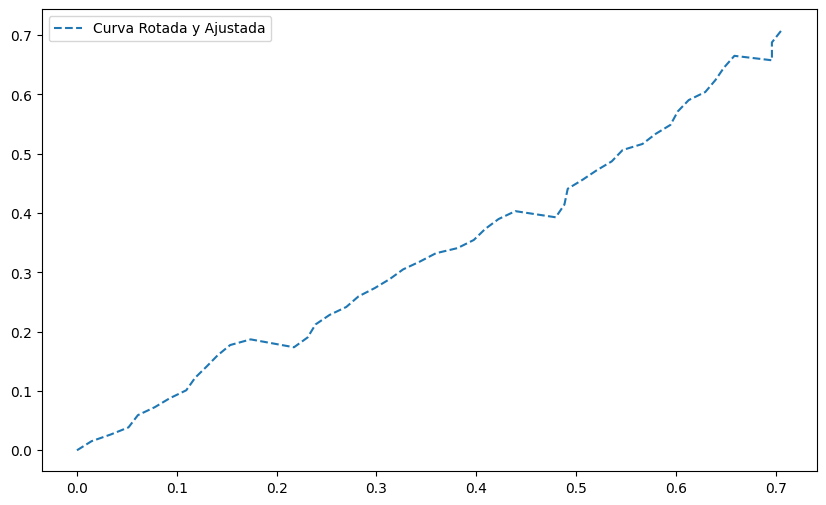

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Función para escalar las curvas para mantener la proporción adecuada al rotar
def scale_curve(curve):
    x = np.array(range(len(curve)))  # Los puntos en el eje X (0 a 47)
    y = np.array(curve)

    # Reescalar el eje X de 0 a 1
    x_scaled = (x - x.min()) / (x.max() - x.min())
    return x_scaled, y

# Función para rotar la curva
def rotate_curve(curve):
    # Escalamos la curva
    x_scaled, y = scale_curve(curve)
    
    # Crear la matriz de rotación para 45 grados
    rotation_matrix = np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)],
                                [np.sin(np.pi / 4), np.cos(np.pi / 4)]])
    
    # Aplicamos la rotación
    rotated = np.dot(rotation_matrix, np.array([x_scaled, y]))
    
    return rotated[0], rotated[1]  # Coordenadas rotadas

# Función para ajustar la curva a (0,0)
def adjust_to_origin(x, y):
    x -= x[0]
    y -= y[0]
    return x, y

# Ejemplo de uso con una curva del array `curves_mod`
curve = curves_mod[0]  # Tomamos la primera curva

# Rotamos la curva
rotated_x, rotated_y = rotate_curve(curve)

# Ajustamos para que comience en (0,0)
adjusted_x, adjusted_y = adjust_to_origin(rotated_x, rotated_y)

# Graficamos la curva original y la transformada
plt.figure(figsize=(10,6))
#plt.plot(range(len(curve)), curve, label='Curva Original')
plt.plot(adjusted_x, adjusted_y, label='Curva Rotada y Ajustada', linestyle='--')
plt.legend()
plt.show()


In [9]:
curves_mod[0]

array([0.80586426, 0.80634286, 0.80080502, 0.79665369, 0.80458806,
       0.80212356, 0.80219271, 0.79995494, 0.8086217 , 0.81377871,
       0.81940542, 0.82280312, 0.81504197, 0.77495018, 0.77698807,
       0.78691035, 0.78828086, 0.78593559, 0.78991322, 0.78830207,
       0.78839721, 0.79049189, 0.78793146, 0.78651396, 0.7773519 ,
       0.77549206, 0.78057981, 0.78290551, 0.78043639, 0.74449248,
       0.7534681 , 0.77003258, 0.77023441, 0.77149983, 0.77150148,
       0.77732419, 0.77048845, 0.77317656, 0.77340613, 0.78428909,
       0.79005639, 0.78792892, 0.79492813, 0.80386296, 0.81044511,
       0.77854831, 0.79988789, 0.80755858])

In [20]:
# Crear un arreglo vacío para las curvas ajustadas y rotadas
curves_rotated_adjusted = []

# Iterar sobre todas las curvas y aplicar la rotación y ajuste
for curve in curves_mod:
    rotated_x, rotated_y = rotate_curve(curve)
    adjusted_x, adjusted_y = adjust_to_origin(rotated_x, rotated_y)
    # Guardar la curva ajustada y rotada en el arreglo
    curves_rotated_adjusted.append(adjusted_y)

# Convertir la lista de curvas ajustadas y rotadas en un arreglo NumPy
curves_rotated_adjusted = np.array(curves_rotated_adjusted)

# Mostrar las primeras curvas ajustadas y rotadas
print(curves_rotated_adjusted[:5])  # Muestra las primeras 5 curvas


[[ 0.          0.01538325  0.02651223  0.03862162  0.05927689  0.07257905
   0.08767277  0.10113526  0.12230841  0.14099979  0.1600233   0.17747066
   0.18702752  0.17372317  0.190209    0.21226994  0.22828386  0.24167033
   0.25952776  0.27343334  0.28854543  0.30507142  0.31830575  0.33234825
   0.34091452  0.35464424  0.37328665  0.38997599  0.40327489  0.39290353
   0.41429508  0.44105275  0.4562403   0.47217991  0.4872259   0.506388
   0.51659923  0.53354484  0.54875199  0.57149223  0.59061515  0.60415563
   0.62414965  0.64551235  0.66521145  0.65770184  0.68783603  0.70830485]
 [ 0.          0.0152897   0.02960248  0.04362099  0.05926725  0.07277349
   0.08646836  0.10107406  0.11775484  0.13191223  0.14527971  0.1602437
   0.17619375  0.19085916  0.2034675   0.21768486  0.23498668  0.25296626
   0.27328743  0.30048232  0.32247578  0.34248946  0.36279285  0.3788292
   0.39838303  0.41447191  0.42905862  0.4439922   0.45754072  0.47010238
   0.48547996  0.50028522  0.51111863  0.

In [21]:
clusters = apply_clustering(curves_rotated_adjusted)

In [27]:
print(np.bincount(clusters["KMeans"]))
print(np.bincount(clusters["GaussianMixture"]))
print(np.bincount(clusters["Birch"]))
print(np.bincount(clusters["Spectral"]))

[117  88  15 167]
[127  80  15 165]
[ 39   2 329  17]
[133 135  97  22]


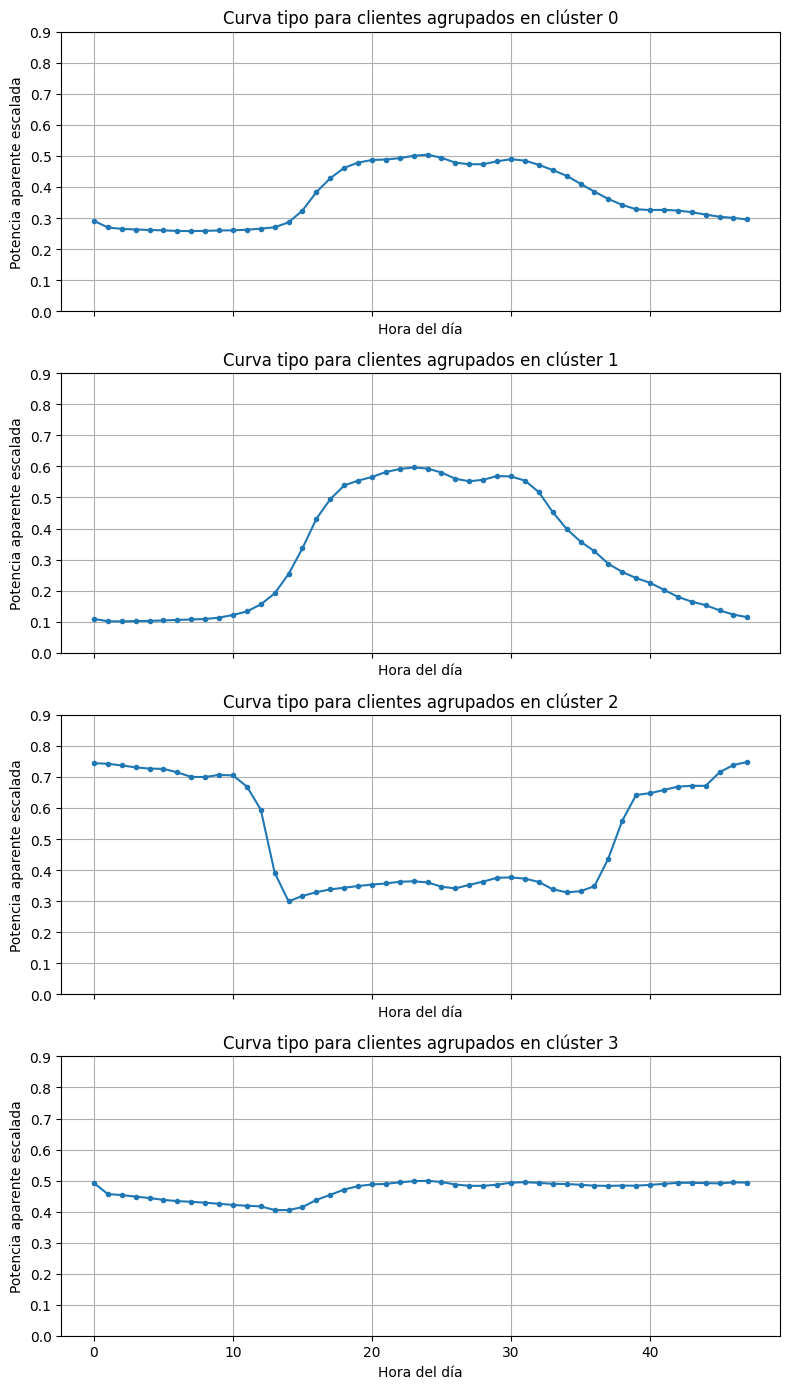

In [24]:
graficar_curva_tipo_cluster(curves_data, clusters["KMeans"])

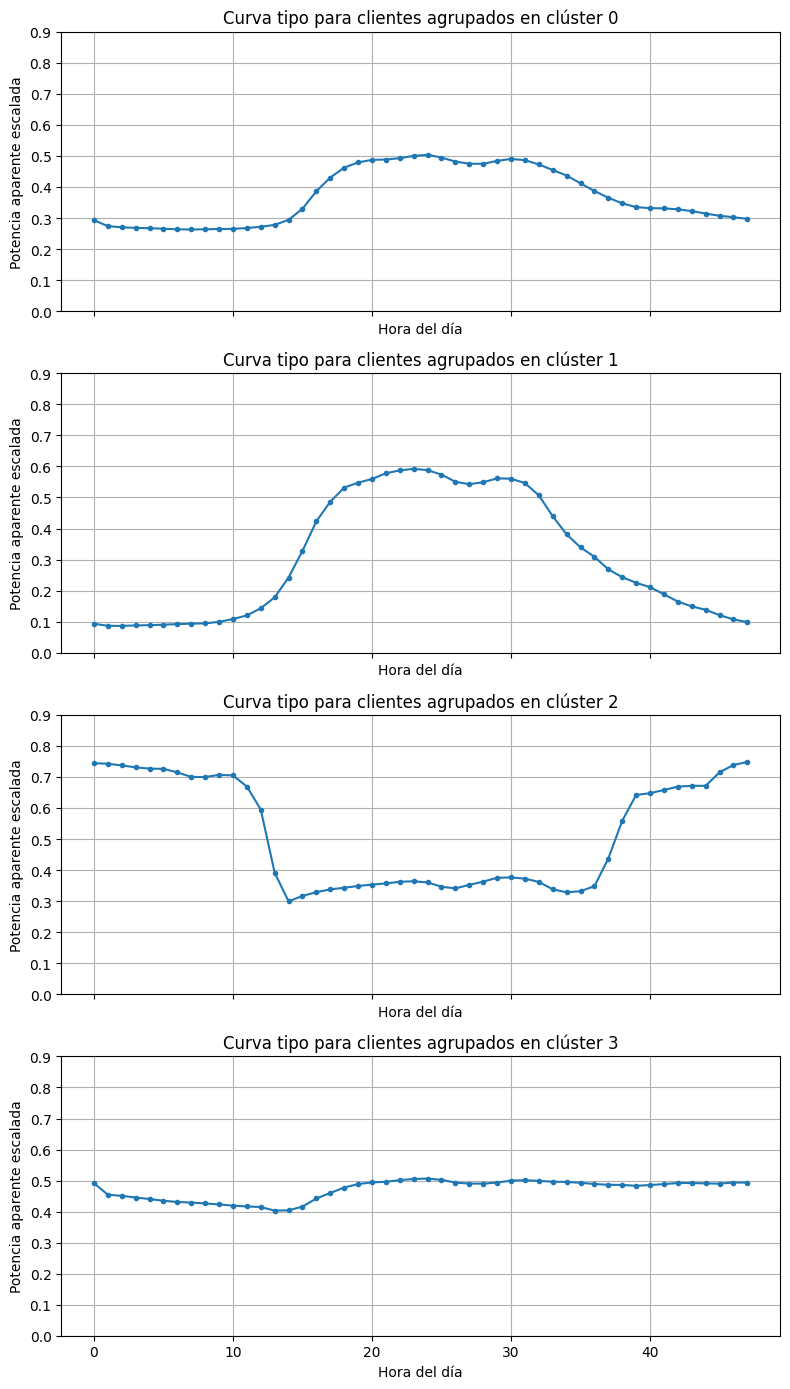

In [25]:
graficar_curva_tipo_cluster(curves_data, clusters["GaussianMixture"])

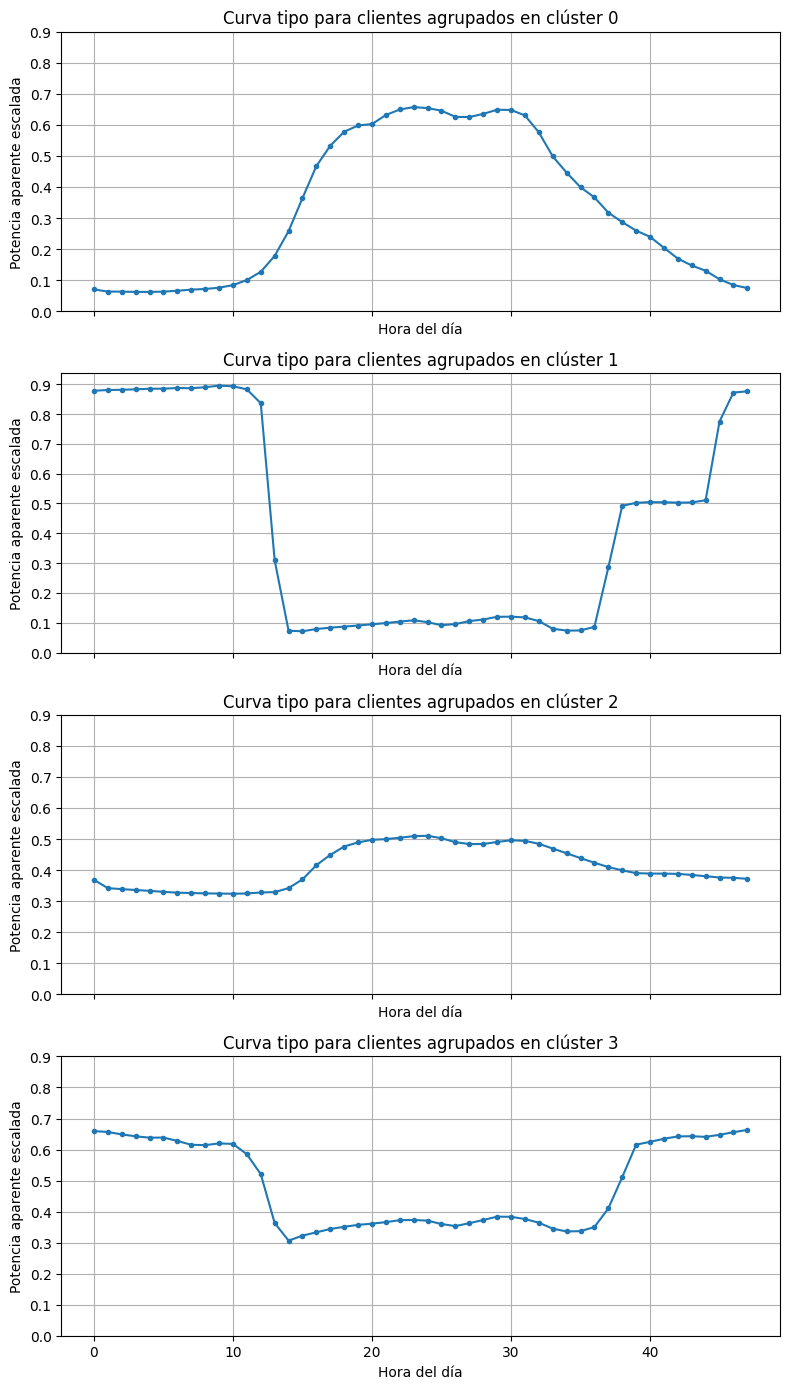

In [26]:
graficar_curva_tipo_cluster(curves_data, clusters["Birch"])

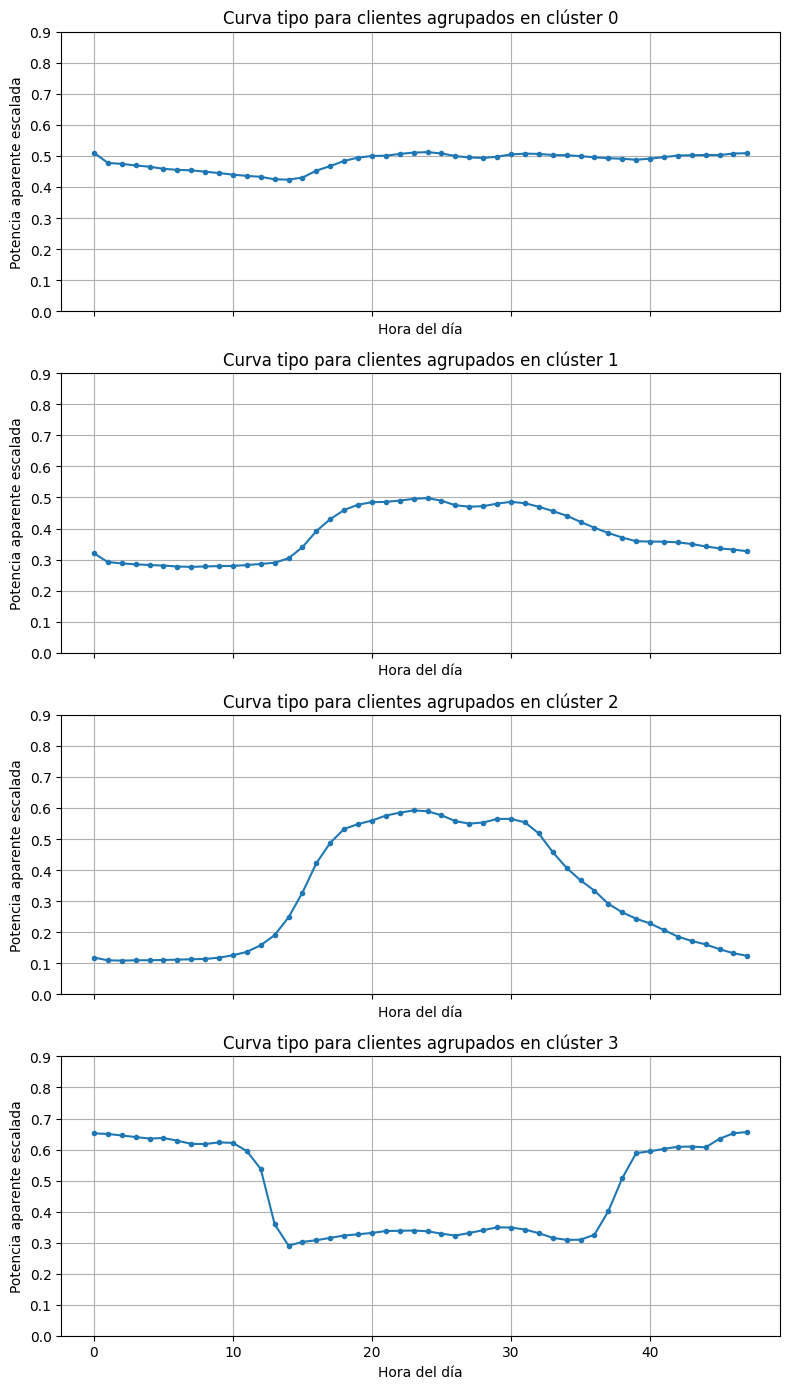

In [28]:
graficar_curva_tipo_cluster(curves_data, clusters["Spectral"])

In [32]:
print(curves.shape)
print(clusters["Spectral"].shape)

(387, 49)
(387,)


In [33]:
concatenado = np.concatenate([curves, clusters["Spectral"].reshape(-1,1)], axis=1)


In [34]:
print(concatenado.shape)

(387, 50)


In [39]:
filtrado = concatenado[concatenado[:,49]==3][:,0]

In [40]:
print(filtrado)

['1297988' '1773847' '1990250' '90000496' '90001208' '90001702' '90001730'
 '90001741' '90001794' '90002241' '90002524' '90002610' 'CLARIVEL'
 'ESTACIÓN DE BOMBEO CHIRIYACU ALTO' 'ESTACIÓN DE BOMBEO GRANDA GARCES'
 'PLANTA DE TRATAMIENTO CHILIBULO' 'PLANTA DE TRATAMIENTO EL PLACER'
 'PLANTA DE TRATAMIENTO EL TROJE' 'PLANTA DE TRATAMIENTO TESALIA'
 'PLANTA DE TRATAMIENTO TOCTIUCO' 'PLANTA DE TRATAMIENTO YARUQUI'
 'PLANTAS TECNICAS PLANTEC']
